# Severe Weather Capstone - EDA

Greg Welliver   

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
import warnings
from scipy import stats
import re
from glob import glob, iglob
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS

# Seaborn settings
sns.set_context('notebook')
#sns.set_style("whitegrid")
#sns.set_style("white")
style_set = sns.set_style('whitegrid')
pd.options.display.float_format = '{:,}'.format
color_choice1 = 'plum'
color_choice2 = 'lightblue'
color_choice3 = 'lightgreen'
#ax.yaxis.set_major_formatter('{x:,.0f}')
#sns.set_context('notebook', font_scale = 4)


%matplotlib inline
import pandas as pd
#from mpl_toolkits.basemap import Basemap


import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx

from sklearn.feature_extraction.text import CountVectorizer


## abc



In [2]:
# load data
#df = pd.read_csv("../Data/StormEvents_details-ftp_v1.0_d2001_c20220425.csv")
#df = pd.read_parquet("../Data/all_storm_data9.pqt")
df = pd.read_parquet("../Data/all_storm_data11.pqt")
#df = pd.read_csv("../Data/all_storm_data4.csv")

In [3]:
df.head(40).T

0   \
BEGIN_YEARMONTH                                               202202   
BEGIN_TIME                                                      2118   
STATE                                                         NEVADA   
YEAR                                                            2022   
MONTH_NAME                                                  February   
EVENT_TYPE                                                 High Wind   
BEGIN_DATE_TIME                                  2022-02-20 21:18:00   
INJURIES_DIRECT                                                    0   
INJURIES_INDIRECT                                                  0   
DEATHS_DIRECT                                                      0   
DEATHS_INDIRECT                                                    0   
DAMAGE_PROPERTY                                                  0.0   
MAGNITUDE                                                       36.0   
MAGNITUDE_TYPE                                                    MS   
FLOOD_CAUSE                                                     None   
TOR_F_SCALE                                                     None   
TOR_LENGTH                                                       0.0   
TOR_WIDTH                                                        0.0   
BEGIN_LAT                                                        NaN   
BEGIN_LON                                                        NaN   
EPISODE_NARRATIVE  Strong winds increased ahead of an approaching...   
EVENT_NARRATIVE    Station (UP994) 3.1 SE West Wendover, Elevatio...   
ST_CT_FIPS                                                     32033   
DURATION                                                        60.0   
STORM_AREA                                                       NaN   
PopDensity                                              0.4236221825   
Population                                                   9,078.0   
HPI                                                         34,169.0   

                                                                  1   \
BEGIN_YEARMONTH                                               202202   
BEGIN_TIME                                                       800   
STATE                                                         NEVADA   
YEAR                                                            2022   
MONTH_NAME                                                  February   
EVENT_TYPE                                                Heavy Snow   
BEGIN_DATE_TIME                                  2022-02-21 08:00:00   
INJURIES_DIRECT                                                    0   
INJURIES_INDIRECT                                                  0   
DEATHS_DIRECT                                                      0   
DEATHS_INDIRECT                                                    0   
DAMAGE_PROPERTY                                                  0.0   
MAGNITUDE                                                        0.0   
MAGNITUDE_TYPE                                                  None   
FLOOD_CAUSE                                                     None   
TOR_F_SCALE                                                     None   
TOR_LENGTH                                                       0.0   
TOR_WIDTH                                                        0.0   
BEGIN_LAT                                                        NaN   
BEGIN_LON                                                        NaN   
EPISODE_NARRATIVE  A low centered over northern and central Nevad...   
EVENT_NARRATIVE    Thirteen inches fell at station (BCSN2) Big Cr...   
ST_CT_FIPS                                                     32037   
DURATION                                                     1,560.0   
STORM_AREA                                                       NaN   
PopDensity                                                       NaN   
Population                       

df['day_of_week'] = "NaN"

df['day_of_week']

In [4]:
#df['HPI']

In [5]:
#df['HPI'] = df['HPI'].astype(float)

In [6]:
#df['HPI'] = df['HPI'].astype(float)

In [7]:
#df['HPI'] = df['HPI'].str.replace(".", "")

### Ideas:
- count of event type - DONE
- trends in event type over time
- storms by state - DONE
- storms by county - would need to get county name back
- storm damage by county - would need to get county name back
- storm damage by state - DONE
- relationship between population density and damage
- relationship between home price index and damage
- relationship between population density and deaths
- relationship between storm area and damage
- correlation heatmap - DONE
- word cloud/word counts for event narratives - DONE
- start times - put in 2 hour bins - DONE

breakdown of most damaging storms - take something like the top 10
- most damaging storms - top 20
- breakdown by storm type, state


In [8]:
df['DAMAGE_PROPERTY'][:20]

0         0.0
1         0.0
2         0.0
3         0.0
4    50,000.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
Name: DAMAGE_PROPERTY, dtype: float64

df.style.format({"DAMAGE_PROPERTY": "{:,.0f}"})

df['DAMAGE_PROPERTY'] = df.apply(lambda x: "{:,}".format(x['DAMAGE_PROPERTY']), axis=1)

map code

import plotly.express as px

# fig = px.scatter_geo(df,lat='BEGIN_LAT',lon='BEGIN_LON', hover_name="id")
fig = px.scatter_geo(df,lat='BEGIN_LAT',lon='BEGIN_LON')
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

# setting the size of the map
fig = plt.figure(figsize=(12,9))

# creating the map - setting latitude and longitude
m = Basemap(projection = 'mill', llcrnrlat = -90, urcrnrlat = 90, llcrnrlon = -180, urcrnrlon = 180, resolution = 'c')

# drawing the coastline
m.drawcoastlines()
m.drawcountries(color='gray')
m.drawstates(color='gray')

# creating variable for latitude and longitude to list
lat = df['BEGIN_LAT'].tolist()
lon = df['BEGIN_LON'].tolist()

# plotting the map
m.scatter(lon, lat, latlon = True, s = 10, c = 'red', marker = 'o', alpha = 1)

plt.show()

In [9]:
#street_map = gpd.read_file('../Data/tl_2022_us_state.shp')

# designate coordinate system
crs = {'init':'espc:4326'}
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df['BEGIN_LON'], df['BEGIN_LAT'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df,
 crs = crs,
 geometry = geometry)

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.BEGIN_LON, df.BEGIN_LAT))

In [10]:
#print(gdf.head())

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

df_map = df[df['BEGIN_LON'].notna()].reset_index(drop=True)

 
long = list(df_map.BEGIN_LON)
lat = list(df_map.BEGIN_LAT)
geometry = [Point(xy) for xy in zip(long,lat)]


wardlink = "../Data/tl_2022_us_state.shp"

ward = gpd.read_file(wardlink, bbox=None, mask=None, rows=None)
geo_df = gpd.GeoDataFrame(geometry = geometry)

ward.crs = {'init':"epsg:4326"}
geo_df.crs = {'init':"epsg:4326"}

# plot the polygon
ax = ward.plot(alpha=0.35, color='#d66058', zorder=1)
# plot the boundary only (without fill), just uncomment
#ax = gpd.GeoSeries(ward.to_crs(epsg=3857)['geometry'].unary_union).boundary.plot(ax=ax, alpha=0.5, color="#ed2518",zorder=2)
ax = gpd.GeoSeries(ward['geometry'].unary_union).boundary.plot(ax=ax, alpha=0.5, color="#ed2518",zorder=2)

# plot the marker
ax = geo_df.plot(ax = ax, markersize = 20, color = 'red',marker = '*',label = 'Delhi', zorder=3)

ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

example capstones with maps: 
- https://github.com/connormca12/Springboard-Projects/blob/master/Capstone-1/data_storytelling.ipynb
- https://nbviewer.org/github/pratha19/NYC_taxi_trip_duration/blob/master/notebooks/NYC_EDA.ipynb

- https://github.com/LisaATaylor/Rideshare/blob/master/Chicago%20Rideshare%20-%20Wrangling+Visualization.ipynb

- https://stackoverflow.com/questions/63644131/how-to-use-geopandas-to-plot-latitude-and-longitude-on-a-more-detailed-map-with

- https://medium.com/@ianforrest11/graphing-latitudes-and-longitudes-on-a-map-bf64d5fca391

- shapefiles: https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2022&layergroup=States+%28and+equivalent%29

df_map = df_map[df_map['BEGIN_LON'] > -125 ].reset_index(drop=True)
len(df_map)

df_map = df_map[df_map['BEGIN_LON'] < -50 ].reset_index(drop=True)
len(df_map)

df_map = df_map[df_map['BEGIN_LAT'] > 35 ].reset_index(drop=True)
len(df_map)

 
long = list(df_map.BEGIN_LON)
lat = list(df_map.BEGIN_LAT)
geometry = [Point(xy) for xy in zip(long,lat)]


wardlink = "../Data/tl_2022_us_state.shp"

ward = gpd.read_file(wardlink, bbox=None, mask=None, rows=None)
geo_df = gpd.GeoDataFrame(geometry = geometry)

ward.crs = {'init':"epsg:4326"}
geo_df.crs = {'init':"epsg:4326"}

# plot the polygon
ax = ward.plot(alpha=0.35, color='#d66058', zorder=1)
# plot the boundary only (without fill), just uncomment
#ax = gpd.GeoSeries(ward.to_crs(epsg=3857)['geometry'].unary_union).boundary.plot(ax=ax, alpha=0.5, color="#ed2518",zorder=2)
ax = gpd.GeoSeries(ward['geometry'].unary_union).boundary.plot(ax=ax, alpha=0.5, color="#ed2518",zorder=2)

# plot the marker
ax = geo_df.plot(ax = ax, markersize = 20, color = 'red',marker = '*',label = 'Delhi', zorder=3)

ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

''

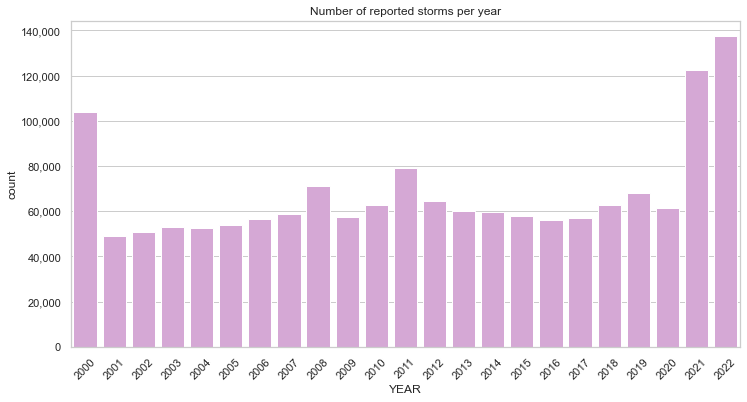

In [11]:
fig, ax = plt.subplots(figsize = (12 , 6))
plt.title("Number of reported storms per year")
sns.countplot(x='YEAR', data=df, color=color_choice1)
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter('{x:,.0f}')

;

In [12]:
# the large increase from 2020 to 2021 is worth looking into
len(df[df['YEAR'] == 2021]) - len(df[df['YEAR'] == 2020])

61249

In [13]:
df[df['YEAR'] == 2020].EVENT_TYPE.value_counts()[:10]

Thunderstorm Wind           19314
Hail                         7670
High Wind                    3669
Flash Flood                  3571
Winter Weather               2910
Marine Thunderstorm Wind     2887
Flood                        2703
Drought                      2244
Winter Storm                 2094
Heavy Snow                   1792
Name: EVENT_TYPE, dtype: int64

In [14]:
df[df['YEAR'] == 2021].EVENT_TYPE.value_counts()[:10]

Thunderstorm Wind           31066
Hail                        12544
Flash Flood                  9594
High Wind                    9194
Drought                      8166
Winter Weather               7828
Winter Storm                 5890
Marine Thunderstorm Wind     5368
Heavy Snow                   4468
Flood                        4062
Name: EVENT_TYPE, dtype: int64

#### Comment on the large change from 2020 to 2021:
I was not able to find if there was a change in reporting methodology that drove the large increase year-over-year.  Looking at the storm event data, it does not appear to be isolated to any one particular type of storm - there is an increase across a number of different categories. It seems unlikely that the number of storms actually doubled year-over-year, so will monitor the potential impact of this.

In [15]:
# Lucas comment - break down the years with big spike to see what it is

''

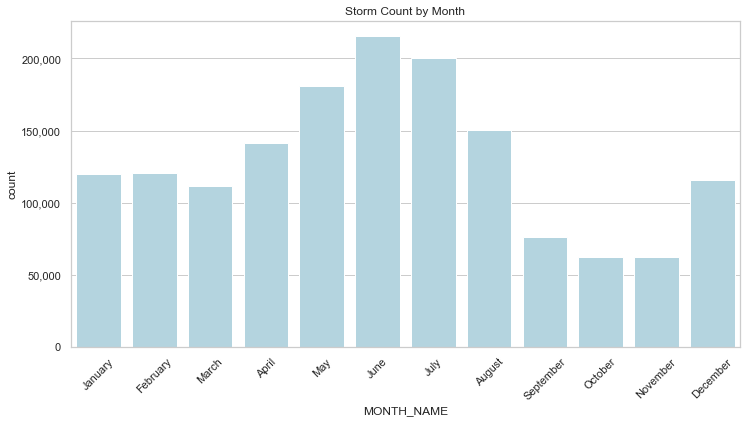

In [16]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig, ax = plt.subplots(figsize = (12 , 6))
plt.title("Storm Count by Month")
sns.countplot(x='MONTH_NAME', data=df, color=color_choice2, order=month_order)
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter('{x:,.0f}')
;

''

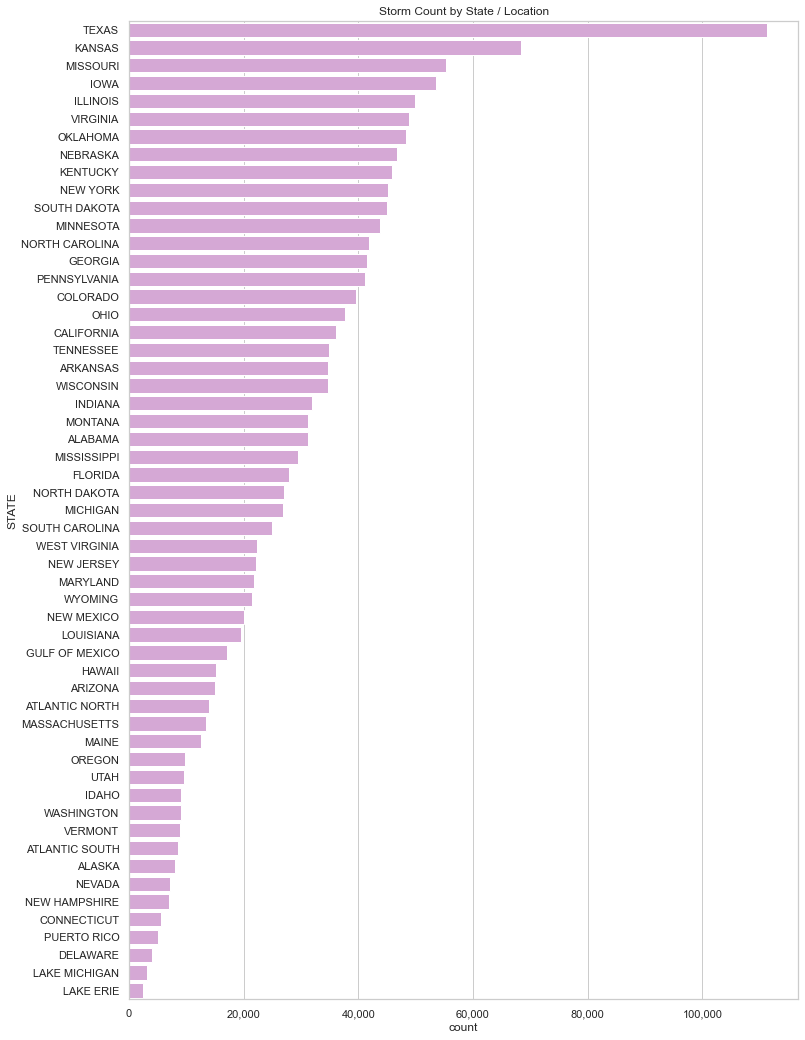

In [17]:
df_state = df[df.groupby('STATE')['STATE'].transform('size') > 2000].reset_index(drop=True)

#sns.set_palette("Bright")
fig, ax = plt.subplots(figsize = (12 , 18))
plt.title("Storm Count by State / Location")

sns.countplot(y='STATE', data=df_state, color=color_choice1, order=df_state['STATE'].value_counts().index)
#sns.countplot(x='EVENT_TYPE', data=df_events, color='blue', order=df_events['EVENT_TYPE'].value_counts(ascending=True).index)
#plt.xticks(rotation=90)
ax.xaxis.set_major_formatter('{x:,.0f}')
;

''

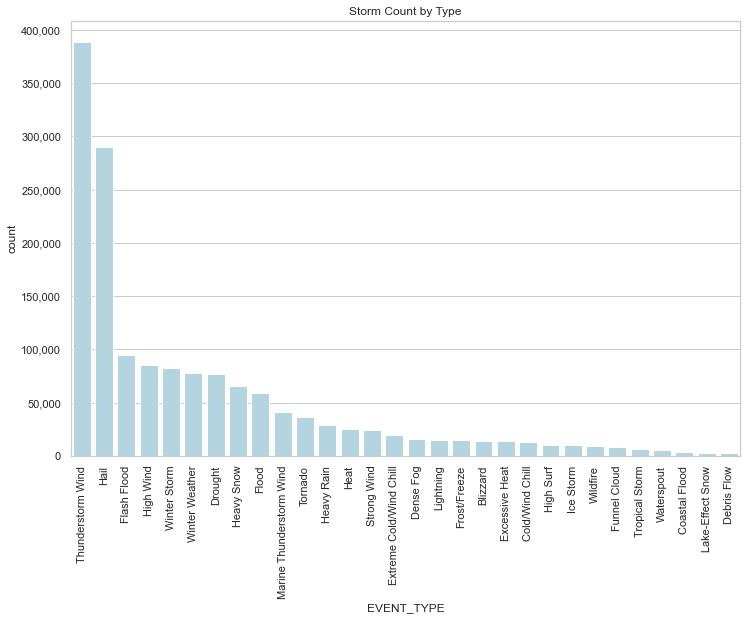

In [18]:
df_events = df[df.groupby('EVENT_TYPE')['EVENT_TYPE'].transform('size') > 2000].reset_index(drop=True)

#sns.set_palette("Bright")
#plt.figure(figsize=(12,6))
fig, ax = plt.subplots(figsize = (12 , 8))
plt.title("Storm Count by Type")

sns.countplot(x='EVENT_TYPE', data=df_events, color=color_choice2, order=df_events['EVENT_TYPE'].value_counts().index)
#sns.countplot(x='EVENT_TYPE', data=df_events, color='blue', order=df_events['EVENT_TYPE'].value_counts(ascending=True).index)
plt.xticks(rotation=90)
ax.yaxis.set_major_formatter('{x:,.0f}')
;

fig, ax = plt.subplots(figsize = (12 , 6))
plt.title("Number of reported storms per year")
sns.countplot(x='YEAR', data='EVENT_TYPE', color=color_choice1)
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter('{x:,.0f}')

;

In [19]:
df['DAMAGE_PROPERTY']

0               0.0
1               0.0
2               0.0
3               0.0
4          50,000.0
             ...   
1555642         0.0
1555643         0.0
1555644   300,000.0
1555645         0.0
1555646         0.0
Name: DAMAGE_PROPERTY, Length: 1555647, dtype: float64

In [20]:
df.sort_values('DAMAGE_PROPERTY', ascending=False).T

1490928  \
BEGIN_YEARMONTH                                               200508   
BEGIN_TIME                                                       200   
STATE                                                      LOUISIANA   
YEAR                                                            2005   
MONTH_NAME                                                    August   
EVENT_TYPE                                          Storm Surge/Tide   
BEGIN_DATE_TIME                                  2005-08-29 02:00:00   
INJURIES_DIRECT                                                    0   
INJURIES_INDIRECT                                                  0   
DEATHS_DIRECT                                                      0   
DEATHS_INDIRECT                                                    0   
DAMAGE_PROPERTY                                     17,900,000,000.0   
MAGNITUDE                                                        0.0   
MAGNITUDE_TYPE                                                  None   
FLOOD_CAUSE                                                     None   
TOR_F_SCALE                                                     None   
TOR_LENGTH                                                       0.0   
TOR_WIDTH                                                        0.0   
BEGIN_LAT                                                        NaN   
BEGIN_LON                                                        NaN   
EPISODE_NARRATIVE  Storm surge damage in southeast Louisiana, esp...   
EVENT_NARRATIVE                                                 None   
ST_CT_FIPS                                                     22062   
DURATION                                                       900.0   
STORM_AREA                                                       NaN   
PopDensity                                                       NaN   
Population                                                       NaN   
HPI                                                              NaN   

                                                             1423421  \
BEGIN_YEARMONTH                                               201811   
BEGIN_TIME                                                       633   
STATE                                                     CALIFORNIA   
YEAR                                                            2018   
MONTH_NAME                                                  November   
EVENT_TYPE                                                  Wildfire   
BEGIN_DATE_TIME                                  2018-11-08 06:33:00   
INJURIES_DIRECT                                                   12   
INJURIES_INDIRECT                                                  0   
DEATHS_DIRECT                                                     86   
DEATHS_INDIRECT                                                    0   
DAMAGE_PROPERTY                                     17,000,000,000.0   
MAGNITUDE                                                        0.0   
MAGNITUDE_TYPE                                                  None   
FLOOD_CAUSE                                                     None   
TOR_F_SCALE                                                     None   
TOR_LENGTH                                                       0.0   
TOR_WIDTH                                                        0.0   
BEGIN_LAT                                                        NaN   
BEGIN_LON                                                        NaN   
EPISODE_NARRATIVE  An extended period of dry weather through the ...   
EVENT_NARRATIVE    The Camp Fire began on the morning of November...   
ST_CT_FIPS                                                     06066   
DURATION                                                    24,987.0   
STORM_AREA                                                       NaN   
PopDensity                                                       NaN   
Population                  

In [21]:
# code to see how many values in the damage property column are more than 3 standard deviations away (proxy for outliers)
data = df["DAMAGE_PROPERTY"]
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
#sample_outliers = detect_outliers_zscore(sample)
sample_outliers = detect_outliers_zscore(data)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [115000000.0, 300000000.0, 500000000.0, 500000000.0, 7000000000.0, 2000000000.0, 3000000000.0, 1000000000.0, 245000000.0, 115000000.0, 241000000.0, 340000000.0, 495000000.0, 206000000.0, 2200000000.0, 547000000.0, 440000000.0, 1500000000.0, 165000000.0, 123000000.0, 166500000.0, 106000000.0, 146500000.0, 177000000.0, 674000000.0, 3000000000.0, 382000000.0, 2000000000.0, 2500000000.0, 260000000.0, 500000000.0, 1000000000.0, 2500000000.0, 1000000000.0, 240000000.0, 320400000.0, 4000000000.0, 373000000.0, 881000000.0, 250000000.0, 452000000.0, 200000000.0, 500000000.0, 139000000.0, 125000000.0, 200000000.0, 500000000.0, 500000000.0, 750000000.0, 500000000.0, 300000000.0, 500000000.0, 1000000000.0, 750000000.0, 750000000.0, 250000000.0, 250000000.0, 500000000.0, 250000000.0, 500000000.0, 500000000.0, 750000000.0, 750000000.0, 250000000.0, 500000000.0, 500000000.0, 300000000.0, 300000000.0, 2000000000.0, 696400000.0, 1040000000.0, 278600000.0, 155000000.0, 25

In [22]:
df.shape

(1555647, 28)

In [23]:
df["DAMAGE_PROPERTY"].value_counts()

0.0              1208379
5,000.0            44298
1,000.0            42880
10,000.0           37586
2,000.0            30523
                  ...   
124,000,000.0          1
1,710,000.0            1
3,850.0                1
81,000,000.0           1
322,200.0              1
Name: DAMAGE_PROPERTY, Length: 2060, dtype: int64

In [24]:
1208379/1558288

0.7754529329623279

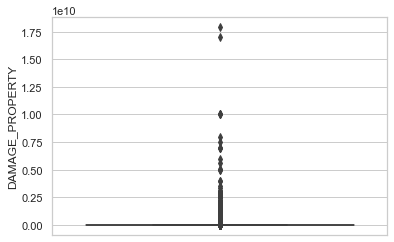

In [25]:
# look for outliers with a boxplot
sns.boxplot( y=df["DAMAGE_PROPERTY"] );
plt.show()

In [26]:
# do a log norm of this plot
# try doing KDE
# try Light GBM and XGBoost
# tweedie distribution - 

/var/folders/rc/20gvvbw10mg1xrcm82p5g4tm0000gn/T/ipykernel_19846/2681487044.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DAMAGE_PROPERTY'])


<AxesSubplot:xlabel='DAMAGE_PROPERTY', ylabel='Density'>

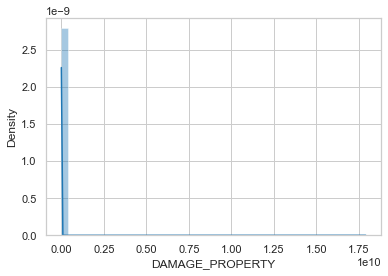

In [27]:
sns.distplot(df['DAMAGE_PROPERTY'])

<AxesSubplot:xlabel='DAMAGE_PROPERTY', ylabel='Count'>

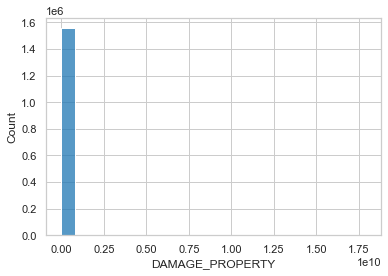

In [28]:
sns.histplot(df['DAMAGE_PROPERTY'])

In [29]:
# look at the top states by damage
df_states = pd.DataFrame(df.groupby('STATE')['DAMAGE_PROPERTY'].sum().sort_values(ascending=False).reset_index()[:15])
df_states['DAMAGE_PROPERTY'] = df_states['DAMAGE_PROPERTY'] / 1000000000
df_states


STATE  DAMAGE_PROPERTY
0        LOUISIANA     107.69998265
1            TEXAS     102.08505003
2          FLORIDA      79.58899878
3      MISSISSIPPI      29.55273556
4       CALIFORNIA      28.59933099
5       NEW JERSEY      27.60074823
6      PUERTO RICO      19.46622814
7         COLORADO       11.8027802
8          ALABAMA      10.30502141
9         MISSOURI       8.06758243
10       TENNESSEE       8.06535718
11        OKLAHOMA       6.18720682
12            OHIO        6.1296391
13  NORTH CAROLINA       5.89244716
14        MICHIGAN       5.35562575

''

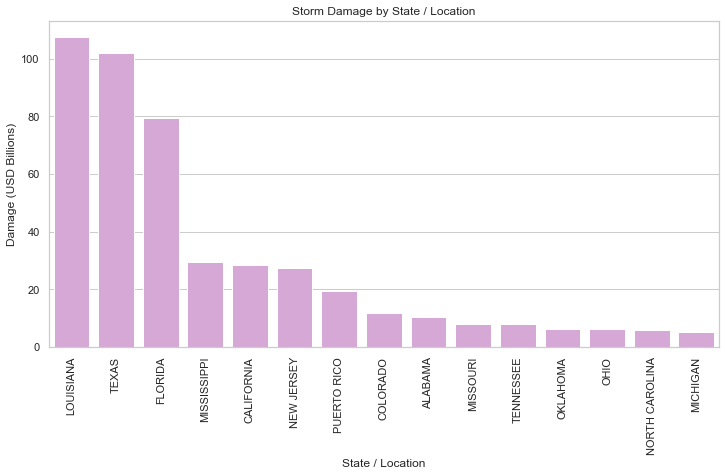

In [30]:
fig, ax = plt.subplots(figsize = (12 , 6))

#plt.figure(figsize=(12,6))
plt.title("Storm Damage by State / Location")
sns.barplot(x = 'STATE', y = 'DAMAGE_PROPERTY', data = df_states,
            color = color_choice1
            )

ax.set_ylabel("Damage (USD Billions)" , size = 12 )
ax.set_xlabel( "State / Location" , size = 12 )
plt.xticks(rotation=90)
;


In [31]:
# look at damage by storm type
df_event = pd.DataFrame(df.groupby('EVENT_TYPE')['DAMAGE_PROPERTY'].sum().sort_values(ascending=False).reset_index()[:15])
df_event['DAMAGE_PROPERTY'] = df_event['DAMAGE_PROPERTY'] / 1000000000
df_event

EVENT_TYPE  DAMAGE_PROPERTY
0           Flash Flood      95.44553643
1             Hurricane       77.7307156
2   Hurricane (Typhoon)      77.06594431
3      Storm Surge/Tide       64.1341336
4              Wildfire      36.95292477
5               Tornado      34.91881289
6                 Flood      34.23029092
7                  Hail      27.82266653
8         Coastal Flood      21.67027776
9        Tropical Storm       17.0781161
10            High Wind      15.44221455
11    Thunderstorm Wind       8.94947299
12            Ice Storm       6.20177453
13         Winter Storm       2.98898961
14              Drought       1.99977815

''

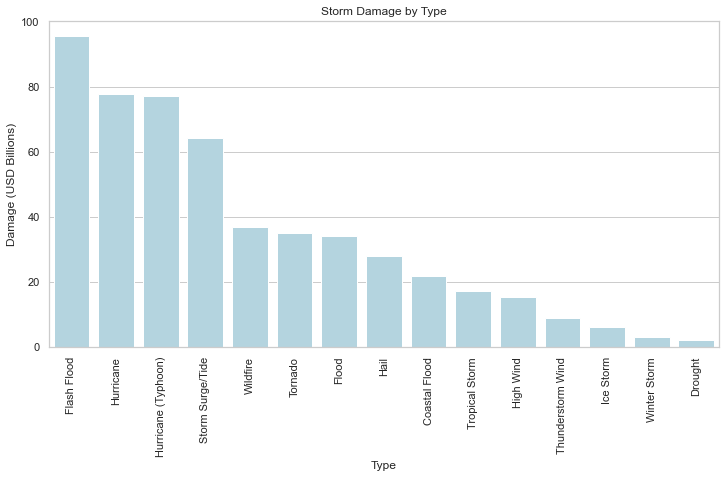

In [32]:
fig, ax = plt.subplots(figsize = (12 , 6))

#plt.figure(figsize=(12,6))
plt.title("Storm Damage by Type")
sns.barplot(x = 'EVENT_TYPE', y = 'DAMAGE_PROPERTY', data = df_event,
            color = color_choice2
            )

ax.set_ylabel("Damage (USD Billions)" , size = 12 )
ax.set_xlabel( "Type" , size = 12 )
plt.xticks(rotation=90)
;


### Look at distribution of storm beginning time

''

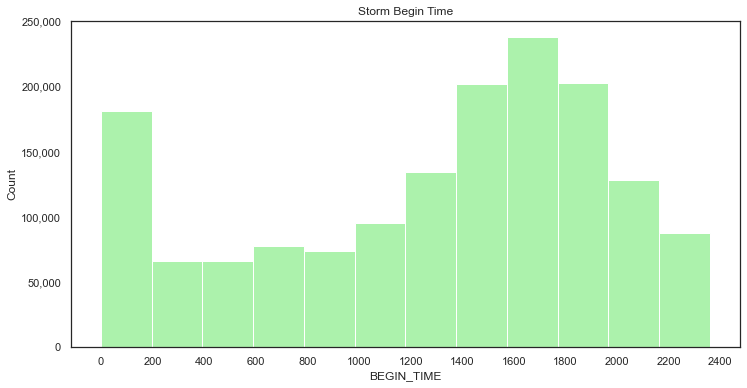

In [33]:
sns.set_style("white")
fig, ax = plt.subplots(figsize = (12 , 6))
plt.title("Storm Begin Time")
sns.histplot(x='BEGIN_TIME', data=df, color=color_choice3, bins=12)
#plt.xticks(rotation=45)
ax.yaxis.set_major_formatter('{x:,.0f}')
plt.xticks(np.arange(0, 2400+100, 200))
;

In [34]:
# comments

In [35]:
df.corr()

BEGIN_YEARMONTH             BEGIN_TIME  \
BEGIN_YEARMONTH                      1.0   -0.03919869980561563   
BEGIN_TIME          -0.03919869980561563                    1.0   
YEAR                  0.9999904744095054   -0.03917502830685883   
INJURIES_DIRECT     -0.00617271092384087 0.00028892109324939386   
INJURIES_INDIRECT   0.000253277086235931 -0.0018794515310195672   
DEATHS_DIRECT     0.00020800536807874482 -0.0022479771033221433   
DEATHS_INDIRECT     0.014605457689619517  -0.009798339594095928   
DAMAGE_PROPERTY    0.0007485229771306517  -0.001636156709438443   
MAGNITUDE            0.07923245782765753    0.14996882184006385   
TOR_LENGTH         0.0016456655712361347   0.026146300169729395   
TOR_WIDTH           0.013920528143037849   0.030889970943824476   
BEGIN_LAT          -0.026934813844558016    0.04294250605868133   
BEGIN_LON            0.05449101600395935   -0.00536192662555944   
DURATION              0.0332511912554923    -0.4314204460825511   
STORM_AREA          0.011643289596882827   -0.07357030427380318   
PopDensity           0.01724681217376169 -0.0058100835076368715   
Population           0.03629664033142333   0.010739740352523501   
HPI                  0.27449402666133793  -0.009145318320139467   

                                    YEAR        INJURIES_DIRECT  \
BEGIN_YEARMONTH       0.9999904744095054   -0.00617271092384087   
BEGIN_TIME          -0.03917502830685883 0.00028892109324939386   
YEAR                                 1.0  -0.006181041181863849   
INJURIES_DIRECT    -0.006181041181863849                    1.0   
INJURIES_INDIRECT 0.00025287823996559004   0.005075219075305023   
DEATHS_DIRECT     0.00019571939893595368     0.1758708672789883   
DEATHS_INDIRECT     0.014592367154060386   0.059966736691813474   
DAMAGE_PROPERTY    0.0007214805422359039    0.08196163238269819   
MAGNITUDE            0.07901380903514775  -0.006664676452376176   
TOR_LENGTH         0.0016632550906894082    0.10305654884198076   
TOR_WIDTH           0.013961983098446994     0.1343185031055749   
BEGIN_LAT          -0.027286073731696607  -0.006077092665655047   
BEGIN_LON            0.05442129735692803   0.001566546358710834   
DURATION             0.03297235361138792   0.001497008103788754   
STORM_AREA          0.011642141631919338   0.027003056153938942   
PopDensity           0.01722358698485873   0.000794310755867278   
Population          0.036175983673924425    0.00447842424635394   
HPI                    0.274329855560778 -0.0007941407456262684   

                        INJURIES_INDIRECT          DEATHS_DIRECT  \
BEGIN_YEARMONTH      0.000253277086235931 0.00020800536807874482   
BEGIN_TIME         -0.0018794515310195672 -0.0022479771033221433   
YEAR               0.00025287823996559004 0.00019571939893595368   
INJURIES_DIRECT      0.005075219075305023     0.1758708672789883   
INJURIES_INDIRECT                     1.0  0.0006674088415945876   
DEATHS_DIRECT       0.0006674088415945876                    1.0   
DEATHS_INDIRECT       0.12319414221455606    0.05568920980392888   
DAMAGE_PROPERTY       0.04674927491467155    0.21663225004278044   
MAGNITUDE           -0.002043516692873005  -0.007144117238668074   
TOR_LENGTH         0.00036020882524502205   0.029284712569275836   
TOR_WIDTH           0.0006260059156300709    0.04320085651368691   
BEGIN_LAT           -0.002308052635502891  -0.009649083766465541   
BEGIN_LON           -0.002243616058827947 0.00014580643259647547   
DURATION           -0.0003182162697480724 -0.0005606072407168083   
STORM_AREA           0.004174651101233805    0.02881487064070151   
PopDensity        -0.00010983966801802125  0.0025815041998478424   
Population         3.5655251212807904e-05    0.00824234751903624   
HPI                 0.0008175662375545093   0.004886973085027932   

                         DEATHS_INDIRECT        DAMAGE_PROPERTY  \
BEGIN_YEARMONTH     0.014605457689619517  0.0007485229771306517   
BEGIN_TIME         -0.009798339594095928  -0.00163

In [36]:
#df = df.rename(columns={'B01001_calc_PopDensity': 'PopDensity'})

In [37]:
#df['Population'] = df['Population'].replace('NaN', 0)
#df['PopDensity'] = df['PopDensity'].replace('NaN', 0)
#df['Population'] = df['Population'].fillna(0)
#df['PopDensity'] = df['PopDensity'].fillna(0)

In [38]:
# set up dataframe for correlation matrix
df_corr = df[['INJURIES_DIRECT', 'INJURIES_INDIRECT','DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'MAGNITUDE', 'TOR_LENGTH', 'TOR_WIDTH', 'BEGIN_LAT','BEGIN_LON', 'DURATION', 'STORM_AREA', 'PopDensity', 'Population', 'HPI']]
#df_corr = df[['INJURIES_DIRECT', 'INJURIES_INDIRECT','DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'MAGNITUDE', 'TOR_LENGTH', 'TOR_WIDTH', 'BEGIN_LAT','BEGIN_LON', 'DURATION', 'STORM_AREA', 'PopDensity']]
#df_corr = df_corr[df_corr.notnull()]

In [39]:
df_corr_columns = ['INJURIES_DIRECT', 'INJURIES_INDIRECT','DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'MAGNITUDE', 'TOR_LENGTH', 'TOR_WIDTH', 'BEGIN_LAT','BEGIN_LON', 'DURATION', 'STORM_AREA', 'PopDensity', 'Population', 'HPI']

In [40]:
#df_corr['Population'].isna().value_counts()

In [41]:
#df_corr['HPI'].isna().value_counts()

In [42]:
#df_corr['HPI'] = df_corr['HPI'].replace('nan', 0)

In [43]:
df_corr['HPI']

0          34,169.0
1               NaN
2         118,374.0
3               NaN
4               NaN
             ...   
1555642         NaN
1555643         NaN
1555644         NaN
1555645         NaN
1555646         NaN
Name: HPI, Length: 1555647, dtype: float64

In [44]:
df_corr['HPI'].isna().value_counts()

False    1051529
True      504118
Name: HPI, dtype: int64

In [45]:
#df['HPI'] = df['HPI'].replace('', 0)

In [46]:
#df_corr['HPI'].isna().value_counts()

In [47]:
#df_corr['HPI'] = df_corr['HPI'].astype(float)

In [48]:
## Next Step: need to figure out how to get rid of / replace all of these NaN values

In [49]:
#df[df['ST_CT_FIPS'] == "06085"]

In [50]:
#df_corr.head(20).T

In [51]:
#df_corr.columns.isin(df_corr_columns) != 'NaN'

In [52]:
#df_corr = df_corr[df_corr.notnull()]
#df_corr = df_corr[df_corr.columns.isin(df_corr_columns) != 'NaN']


In [53]:
# lucas comments from meeting
# this will require a tree based model. linear regression likely will not be able to find the nuances

# perhaps add KDE plot - storm types
# boosting model should help tease out interactions. e.g. break out storm type

# if at the end, have the 
# look at distributions of storm damage by type
# look at 


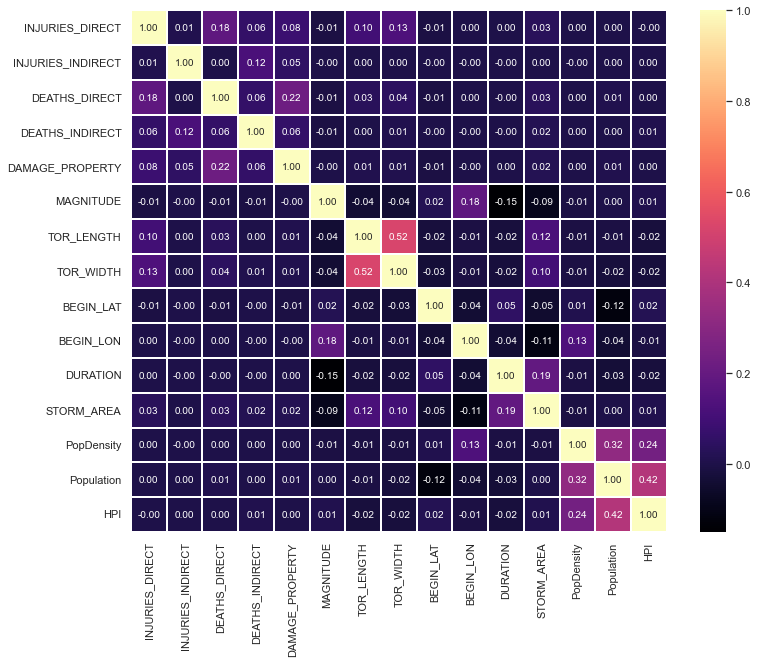

In [54]:
corrmat = df_corr.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap='magma',fmt='.2f',
                 linewidths=.05)
#hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
#                 linewidths=.05)

f.subplots_adjust(top=0.93)
#t= f.suptitle('Match Data Feature Correlation for all USA matches', fontsize=14)

In [55]:
#df.head().T

In [56]:
# sort values by higest to lowest to remove some of the outliers
df2 = df.sort_values('DAMAGE_PROPERTY', ascending=False)

In [57]:
#df2.head().T

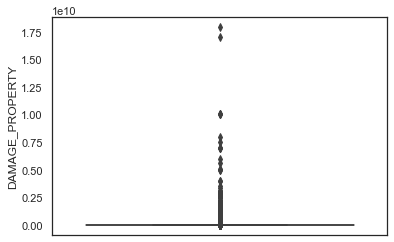

In [58]:
# look for outliers with a boxplot
sns.boxplot( y=df["DAMAGE_PROPERTY"] );
plt.show()

In [59]:
df2.shape

(1555647, 28)

In [60]:
# remove top 10,000 values
df2 = df2[10000:]
#df2 = df2[:70000]


In [61]:
df2.shape

(1545647, 28)

In [62]:
# remove all zeroes

df2 = df2[df2['DAMAGE_PROPERTY'] > 0]


In [63]:
df2.shape

(337268, 28)

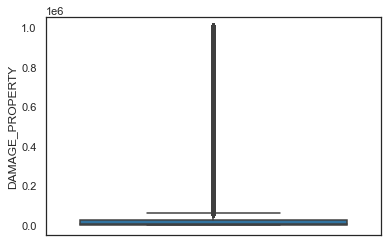

In [64]:
sns.boxplot( y=df2["DAMAGE_PROPERTY"] );
plt.show()

In [65]:
df_corr2 = df2[['INJURIES_DIRECT', 'INJURIES_INDIRECT','DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'MAGNITUDE', 'TOR_LENGTH', 'TOR_WIDTH', 'BEGIN_LAT','BEGIN_LON', 'DURATION', 'STORM_AREA', 'PopDensity', 'Population', 'HPI']]

In [66]:
#df_corr_columns = ['INJURIES_DIRECT', 'INJURIES_INDIRECT','DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'MAGNITUDE', 'TOR_LENGTH', 'TOR_WIDTH', 'BEGIN_LAT','BEGIN_LON', 'DURATION', 'STORM_AREA', 'PopDensity', 'Population', 'HPI']

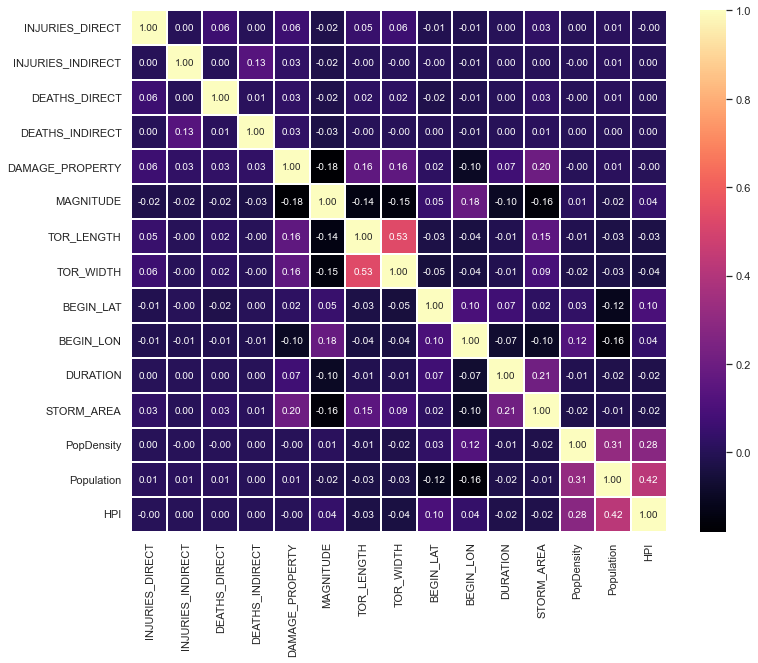

In [67]:
corrmat = df_corr2.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap='magma',fmt='.2f',
                 linewidths=.05)
#hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
#                 linewidths=.05)

f.subplots_adjust(top=0.93)
#t= f.suptitle('Match Data Feature Correlation for all USA matches', fontsize=14)

In [68]:
#df['YEAR'].unique().sort_values()

In [69]:
#df.groupby([df['YEAR']]).count()

## WORKING, MARKDOWN UNTIL FINAL
### word cloud
df['EPISODE_NARRATIVE'] = df['EPISODE_NARRATIVE'].astype('str')
title_corpus = ' '.join(df['EPISODE_NARRATIVE'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()


## WORKING, MARKDOWN UNTIL FINAL
### word cloud
df['EVENT_NARRATIVE'] = df['EVENT_NARRATIVE'].astype('str')
title_corpus = ' '.join(df['EVENT_NARRATIVE'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [70]:
df['EPISODE_NARRATIVE'][2]

'A low centered over northern and central Nevada continued to produce snow showers for multiple days leading to decent mountain snows.'

In [71]:
word_list = ["This is it. You can't stop this"]


In [72]:
word_list = ["This", "is", "it.", "You", "can't", "stop", "this"]

# Instantiate CountVectorizer
cv = CountVectorizer()
# Fit the vectorizer
#cv.fit(df['EPISODE_NARRATIVE'][2])
cv.fit(word_list)


# Print feature names
print(cv.get_feature_names())

#### write to CSV
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Severe-Weather-Repo/Data/all_storm_data5.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)

#### write to parquet
parquet_file = 'example_pd.parquet'

df.to_parquet(parquet_file, engine = 'pyarrow', compression = 'gzip')

logging.info('Parquet file named "%s" has been written to disk', parquet_file)

#### write to parquet
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Severe-Weather-Repo/Data/all_storm_data9.pqt')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_parquet(filepath)

resources

CZ FIPS documentation: https://www.irsa.miami.edu/_assets/pdf/Documents/fips_statecounty_code.pdf

Population density: https://covid19.census.gov/datasets/21843f238cbb46b08615fc53e19e0daf_1/explore?location=2.632620%2C0.315550%2C1.00

Home price index: https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index-Datasets.aspx

maybe useful: https://www.nar.realtor/research-and-statistics/housing-statistics/county-median-home-prices-and-monthly-mortgage-payment
        
land values: https://www.nass.usda.gov/Publications/Todays_Reports/reports/land0822.pdf

drop columns
# WORKING, MARKDOWN UNTIL FINAL
# drop unnecessary columns
df.drop(['', '', '', '',], axis=1, inplace=True)

backup below

In [73]:
#sns.set(font_scale=1)
#f, ax = plt.subplots(figsize=(16, 16))
#sns.heatmap(df_corr.corr(), annot=True, linewidths=.5, ax=ax, fmt='.2f')
##color = plt.get_cmap('RdYlGn')
##color.set_bad('lightblue')    # if the value is bad the color would be lightblue instead of white
##sns.heatmap(df_af.corr(), annot=True, linewidths=.5, ax=ax, fmt='n')
#;

In [74]:
Years_Grouped = df['YEAR'].value_counts().reset_index()
Years_Grouped.index = Years_Grouped.index + 1
Years_Grouped.columns = ['YEAR', 'Count']
Years_Grouped.head(40)

YEAR   Count
1   2022  137406
2   2021  122486
3   2000  104014
4   2011   79091
5   2008   71190
6   2019   67859
7   2012   64503
8   2010   62807
9   2018   62693
10  2020   61237
11  2013   59986
12  2014   59476
13  2007   59010
14  2015   57906
15  2009   57398
16  2017   57029
17  2006   56400
18  2016   56005
19  2005   53976
20  2003   52955
21  2004   52409
22  2002   50936
23  2001   48875